In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import svm

In [2]:
df = pd.read_csv(r"train-80-binary-onehot.csv")
df = df.dropna()
rows = df.shape[0]
print(rows)
groups = np.array(np.zeros(rows))
for i in range(0, int(rows/100)):
    for j in range(0, 99):
        groups[j] = int(i)

7949


In [3]:
#LOGO
logo = LeaveOneGroupOut()
X = df.iloc[:, 5:47]
y = df.iloc[:, 4]
logo.get_n_splits(X, y, groups)
logo.get_n_splits(groups=groups)
for train_index, test_index in logo.split(X, y, groups=groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #print("%s %s" % (train_index, test_index))
    #print("X_train:", X_train, "X_test:", X_test, "y_train:", y_train, "y_test:", y_test)

In [4]:
df_test = pd.read_csv(r"test-5-binary-onehot.csv")
df_test = df_test.dropna()
test_input = df_test.iloc[:, 5:47]
test_output = df_test.iloc[:, 4]

In [5]:
#cross entropy
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets.T*np.log(predictions+1e-9))/N
    return ce

def one_hot_labels(labels):
    one_hot_labels = np.zeros((labels.size, 5))
    one_hot_labels[np.arange(labels.size),labels.astype(int)] = 1
    return one_hot_labels

In [6]:
#SVM with radial basis function
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
num_iter = len(y_train)
RBF_y_pred = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test, RBF_y_pred)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
y_test_enc = one_hot_labels(y_test)
cross_output = np.zeros(num_iter)
for i in range(num_iter):
  cross_output[i] = abs(cross_entropy(RBF_y_pred, y_test_enc))
#cross_output = abs(cross_entropy(RBF_y_pred, y_test_enc))
# plot cross_entropy (y-axis) vs iteration (x-axis)
print(len(cross_output))

Validation Accuracy: 79.80%
7850


Test Accuracy: 79.80%


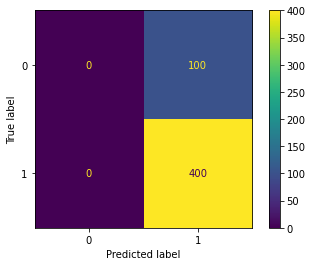

array([[[400,   0],
        [100,   0]],

       [[  0, 100],
        [  0, 400]]])

In [7]:
#use on test set
test_predictions= svclassifier.predict(test_input)
#print(test_predictions)
len(test_predictions)
test_accuracy = accuracy_score(test_output, test_predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = [0, 1]
cm = confusion_matrix(test_output, test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

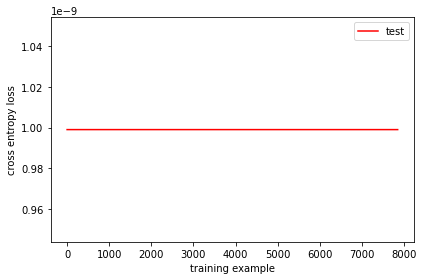

In [8]:
fig, (ax1) = plt.subplots(1, 1)
#ymin, ymax = plt.ylim(0.95, 1.1)
t= np.arange(len(y_train))
ax1.plot(t, cross_output, 'r', label='test')
#ax1.plot(t, cost_dev, 'b', label='dev')
ax1.set_xlabel('training example')
ax1.set_ylabel('cross entropy loss')
ax1.legend(loc='best')
plt.tight_layout()
plt.show()

Validation Accuracy: 20.20%
Test Accuracy: 20.00%


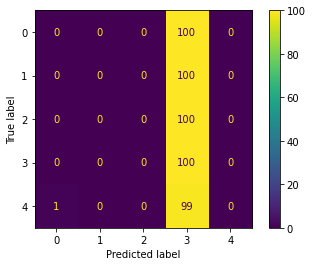

In [12]:
#try multiclass classification
logo = LeaveOneGroupOut()
X = df.iloc[:, 5:47]
y_multi = df.iloc[:, 2]
logo.get_n_splits(X, y, groups)
logo.get_n_splits(groups=groups)
for train_index, test_index in logo.split(X, y_multi, groups=groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_multi, y_test_multi = y_multi.iloc[train_index], y_multi.iloc[test_index]
    #print("%s %s" % (train_index, test_index))
    #print("X_train:", X_train, "X_test:", X_test, "y_train:", y_train, "y_test:", y_test)

test_input_multi = df_test.iloc[:, 5:47]
test_output_multi = df_test.iloc[:, 2]
#train the multiclass model
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train_multi)
RBF_y_pred_multi = svclassifier.predict(X_test)
accuracy = accuracy_score(y_test_multi, RBF_y_pred_multi)
print("Validation Accuracy: %.2f%%" % (accuracy * 100.0))
#use on test data set
multi_test_predictions = svclassifier.predict(test_input_multi)
accuracy = accuracy_score(test_output_multi, multi_test_predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
#produce the confusion matrix
labels = [0, 1, 2, 3, 4]
cm = confusion_matrix(test_output_multi, multi_test_predictions, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()